In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, metrics, models, optimizers, preprocessing, regularizers
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
model = models.Sequential()

In [6]:
model.add(layers.Conv2D(64, (3, 3), activation= 'relu', input_shape = (28, 28, 1)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256, (3, 3), activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'Softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 64)                1638464   
                                                        

In [7]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 197s 104ms/step - loss: 0.3691 - Accuracy: 0.8666
Epoch 2/5
1875/1875 [==============================] - 210s 112ms/step - loss: 0.2305 - Accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 214s 114ms/step - loss: 0.1809 - Accuracy: 0.9338
Epoch 4/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.1424 - Accuracy: 0.9463
Epoch 5/5
1875/1875 [==============================] - 213s 114ms/step - loss: 0.1090 - Accuracy: 0.9600


In [45]:
(loss, accuracy) = model.evaluate(test_images, test_labels)
print("\nThe accuracy of the model on the test dataset is: " + str(round(accuracy * 100, 2)) + "%")

313/313 [==============================] - 7s 23ms/step - loss: 0.2492 - Accuracy: 0.9239

The accuracy of the model on the test dataset is: 92.39%


In [46]:
pred_prob = model.predict(test_images)

313/313 [==============================] - 8s 26ms/step


In [51]:
predictions = []

for i in range(len(pred_prob)):
    maximum = max(pred_prob[i])
    
    for j in range(len(pred_prob[i])):
        if pred_prob[i][j] == maximum:
            predictions.append(j)
            break

In [52]:
#confusion_matrix = confusion_matrix(test_labels, predictions)
#print(confusion_matrix)

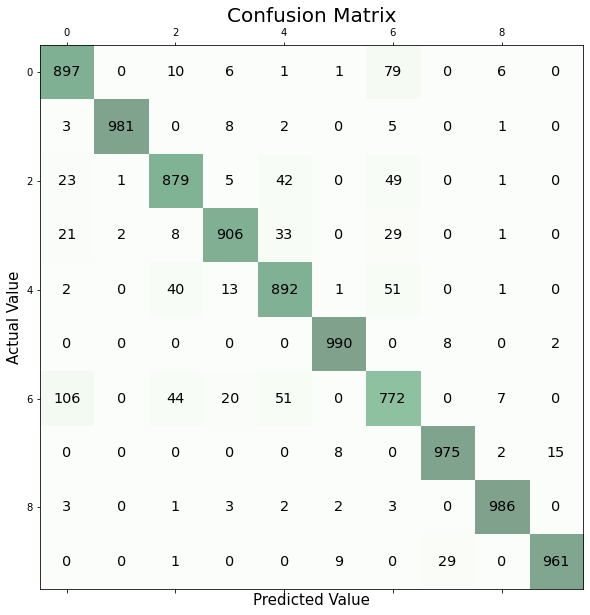

In [53]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(confusion_matrix, cmap = plt.cm.Greens, alpha = 0.5)

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x = j, y = i, s = confusion_matrix[i, j], va = 'center', ha = 'center', size = 'x-large')
        
plt.xlabel('Predicted Value', fontsize = 15)
plt.ylabel('Actual Value', fontsize = 15)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()